In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

# Parse input

# Make functions

In [10]:
training_set_property = pd.read_csv("P09238_target_driven_VS_VS_all.csv", header=0, usecols=range(2, 9))
training_set_property_sampled = training_set_property.iloc[::100, :]

In [ ]:
top_property=pd.read_csv("P09238_target_driven_VS_top_1_ten_thousandth_percent_VS_hits.csv", header=0, usecols=range(2, 9))
top_property = top_property.iloc[443:90

In [12]:
actives_property=pd.read_csv("actives_P09238_properties_calculated.csv", header=0, usecols=range(1, 8))
inactives_property=pd.read_csv("inactives_P09238_properties_calculated.csv", header=0, usecols=range(1, 8))

In [13]:
training_set_property_sampled['Source'] = 'Screening_library'
top_property['Source'] = 'Top'
actives_property['Source'] = 'Actives'
inactives_property['Source'] = 'Inactives'
combined_data = pd.concat([training_set_property_sampled, top_property, actives_property, inactives_property], axis=0, ignore_index=True)
print(combined_data)

         MolWt  MolLogP  NumHAcceptors  NumHDonors  NumRotatableBonds    TPSA  \
0      283.574   2.4616              2           0                  3   34.14   
1      225.049   1.6292              3           1                  1   54.46   
2      318.333   0.0355              6           2                  6  106.08   
3      396.390   3.4043              4           2                  3   67.43   
4      389.354   5.1346              6           0                  4   34.89   
...        ...      ...            ...         ...                ...     ...   
49379  495.526   6.8988              6           1                  5   57.95   
49380  401.371   0.2455              8           6                  1  178.38   
49381  348.471   5.6218              3           2                  5   44.89   
49382  396.491   3.7099              5           1                  5   48.47   
49383  406.555   3.9565              5           1                  7   48.47   

            QED            

/tmp/ipykernel_3906038/3840282597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set_property_sampled['Source'] = 'Screening_library'


In [14]:
features = combined_data.iloc[:, :7]
labels = combined_data['Source']
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)
print(normalized_features)
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)
embedded_data = tsne.fit_transform(normalized_features)
df_embedded = pd.DataFrame(embedded_data, columns=['Dim_1', 'Dim_2'])
df_embedded['Source'] = labels.values

/home/bianlab/software/anaconda3/2024.06/envs/TAME_VS/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/bianlab/software/anaconda3/2024.06/envs/TAME_VS/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[[0.12035139 0.56351521 0.05555556 ... 0.05172414 0.0495472  0.84032311]
 [0.08521859 0.52668351 0.08333333 ... 0.01724138 0.0790375  0.84361758]
 [0.14121737 0.45616612 0.16666667 ... 0.10344828 0.15395333 0.76834189]
 ...
 [0.15930934 0.70334645 0.08333333 ... 0.0862069  0.06514861 0.37509187]
 [0.18813595 0.61874947 0.13888889 ... 0.0862069  0.07034425 0.75023677]
 [0.19417741 0.62966093 0.13888889 ... 0.12068966 0.07034425 0.67655659]]


In [15]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12
plt.rc('font', size=SMALL_SIZE)  
plt.rc('axes', titlesize=MEDIUM_SIZE) 
plt.rc('axes', labelsize=SMALL_SIZE) 
plt.rc('xtick', labelsize=SMALL_SIZE)  
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIGGER_SIZE)  

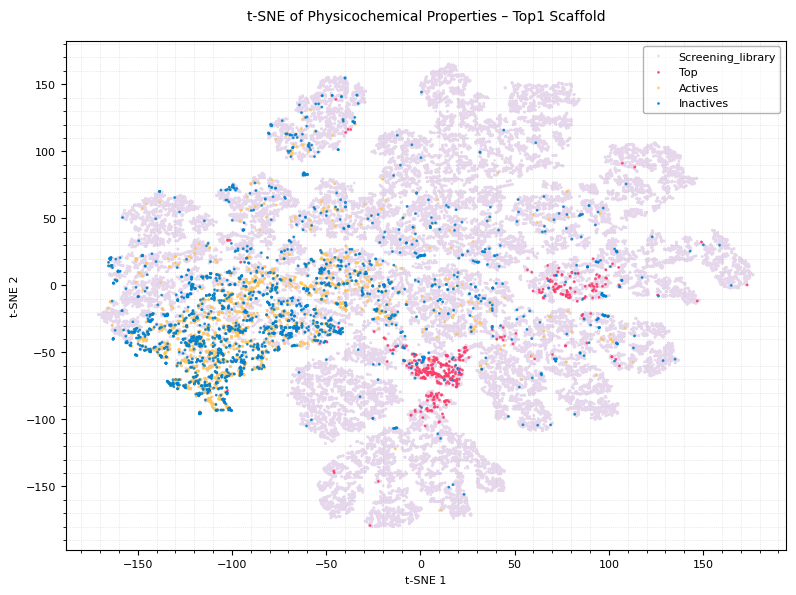

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))

custom_palette = {
    'Screening_library': '#E6D7EC', 
    'Top': '#FE3B69',  
    'Actives': '#ffc75f',  
    'Inactives': '#0081cf',  
}

scatter_plots = []


Screening_df = df_embedded[df_embedded['Source'] == 'Screening_library']
scatter = ax.scatter(
    Screening_df['Dim_1'],
    Screening_df['Dim_2'],
    c=Screening_df['Source'].map(custom_palette),
    label='Screening_library',
    s=1,
    alpha=0.8,
    )

Top_df = df_embedded[df_embedded['Source'] == 'Top']
scatter = ax.scatter(
    Top_df['Dim_1'],
    Top_df['Dim_2'],
    c=Top_df['Source'].map(custom_palette),
    label='Top',
    s=1,
    alpha=0.8,
    )

Actives_df = df_embedded[df_embedded['Source'] == 'Actives']
scatter = ax.scatter(
    Actives_df['Dim_1'],
    Actives_df['Dim_2'],
    c=Actives_df['Source'].map(custom_palette),
    label='Actives',
    s=1,
    alpha=0.8,
    )

Inactives_df = df_embedded[df_embedded['Source'] == 'Inactives']
scatter = ax.scatter(
    Inactives_df['Dim_1'],
    Inactives_df['Dim_2'],
    c=Inactives_df['Source'].map(custom_palette),
    label='Inactives',
    s=1,
    alpha=0.8,
    )

scatter_plots.append(scatter)

ax.set_xlabel("t-SNE 1")
ax.set_ylabel("t-SNE 2")
ax.set_title("t-SNE of Physicochemical Properties – Top1 Scaffold", pad=15)

legend = ax.legend(loc='upper right', frameon=True)
legend.get_frame().set_alpha(0.6)
legend.get_frame().set_edgecolor('gray')

ax.minorticks_on()
ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.savefig("t-SNE_analysis.png", dpi=300)
plt.show()

# Use functions

# Example